## **DATA PREPARATION**


In [ ]:
import pandas as pd

file_path = "50samples.csv"
data = pd.read_csv(file_path, index_col=False, skiprows=0)

print(data)

    Sample ID  passing_no4   passing_no200  LL  PI  Sat_vol_wc  MAAT
0           1           100           75.0  40  19        9.80  17.0
1           2           100           75.0  39  19        9.60  17.5
2           3           100           76.0  40  19        9.70  17.6
3           4            95           52.0  41  18        7.80  22.0
4           5            95           60.0  42  20        8.20  22.5
5           6            95           58.0  38  18        8.50  22.0
6           7            95           55.0  39  18        8.60  22.3
7           8            95           57.0  40  19        8.70  22.8
8           9            94           53.0  41  19        8.50  22.5
9          10            97           28.0  26  11        4.90  19.8
10         11            97           30.0  27  12        5.00  20.0
11         12            97           33.0  28  11        5.30  19.5
12         13            97           35.0  29  12        5.40  19.7
13         14            97       

In [ ]:
import numpy as np

In [ ]:
data.PI = data.PI.astype(float)

In [ ]:
data.info()
data.describe()

data.columns = data.columns.str.replace(' ', '').str.replace(r'\W', '')
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample ID      49 non-null     int64  
 1   passing_no4    49 non-null     int64  
 2   passing_no200  49 non-null     float64
 3   LL             49 non-null     int64  
 4   PI             49 non-null     float64
 5   Sat_vol_wc     49 non-null     float64
 6   MAAT           49 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 2.8 KB
Index(['SampleID', 'passing_no4', 'passing_no200', 'LL', 'PI', 'Sat_vol_wc',
       'MAAT'],
      dtype='object')


In [ ]:
# Generate output variables (Fredlund-Xing Parameters)
a_f = 0.00364*(data.passing_no200 * data.PI*0.01)**3.35 + 4*(data.passing_no200*data.PI) + 11
c_f = 0.0514*(data.passing_no200 * data.PI*0.01)**0.465  + 0.5

data['a_f'] = a_f
data['c_f'] = c_f

In [ ]:
data['b_f'] = c_f*(-2.313*(data.passing_no200*data.PI*0.01)**0.14 + 5)
data['h_r'] = a_f * (32.44 * (2.718281)**(0.0186 * data.passing_no200*data.PI*0.01))

data = data.round({
    'passing_no4': 1,
    'passing_no200': 1,
    'sat_vol_wc': 3,
    'MAAT': 1,
    'a_f': 3,
    'b_f': 3,
    'c_f': 3,
    'h_r': 3
    }
)

# Add split column (80% train, 20% validation)
data['split'] = np.where(data['SampleID'] % 5 == 0, 'validation', 'train')

# Ensure physical constraints
data['LL'] = np.maximum(data['LL'], data['PI'] + 1)
data['PI'] = np.maximum(data['PI'], 0)

In [ ]:
data['a_f'] = a_f/1000
data['h_r'] = data['h_r']


data

,SampleID,passing_no4,passing_no200,LL,PI,Sat_vol_wc,MAAT,a_f,c_f,b_f,h_r,split
0,1,100,75.0,40.0,19.0,9.80,17.0,5.737692,0.677,1.113,242.620668,train
1,2,100,75.0,39.0,19.0,9.60,17.5,5.737692,0.677,1.113,242.620668,train
2,3,100,76.0,40.0,19.0,9.70,17.6,5.814903,0.678,1.111,246.756065,train
3,4,95,52.0,41.0,18.0,7.80,22.0,3.761529,0.645,1.185,145.229292,train
4,5,95,60.0,42.0,20.0,8.20,22.5,4.826009,0.663,1.144,195.705708,validation
5,6,95,58.0,38.0,18.0,8.50,22.0,4.196413,0.653,1.167,165.307336,train
6,7,95,55.0,39.0,18.0,8.60,22.3,3.978879,0.649,1.176,155.171713,train
7,8,95,57.0,40.0,19.0,8.70,22.8,4.353644,0.656,1.161,172.749639,train
8,9,94,53.0,41.0,19.0,8.50,22.5,4.047342,0.650,1.173,158.341556,train
9,10,97,28.0,26.0,11.0,4.90,19.8,1.243158,0.587,1.345,42.705805,validation


In [ ]:
data.to_csv("modified_50samples.csv", index=False)


In [ ]:
try:
  df = pd.read_csv('modified_50samples.csv')
  print(df.head())
except FileNotFoundError:
  print("Error: 'plastic_soils_dataset.csv' not found. Please make sure the file exists in the current directory or provide the correct path.")

   SampleID  passing_no4  passing_no200    LL    PI  Sat_vol_wc  MAAT  \
0         1          100           75.0  40.0  19.0         9.8  17.0   
1         2          100           75.0  39.0  19.0         9.6  17.5   
2         3          100           76.0  40.0  19.0         9.7  17.6   
3         4           95           52.0  41.0  18.0         7.8  22.0   
4         5           95           60.0  42.0  20.0         8.2  22.5   

        a_f    c_f    b_f         h_r       split  
0  5.737692  0.677  1.113  242.620668       train  
1  5.737692  0.677  1.113  242.620668       train  
2  5.814903  0.678  1.111  246.756065       train  
3  3.761529  0.645  1.185  145.229292       train  
4  4.826009  0.663  1.144  195.705708  validation  


# **RANDOM FOREST REGRESSOR**

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
try:
  df = pd.read_csv('modified_50samples.csv')
  print(df.head())
except FileNotFoundError:
  print("Error: 'plastic_soils_dataset.csv' not found. Please make sure the file exists in the current directory or provide the correct path.")


   SampleID  passing_no4  passing_no200    LL    PI  Sat_vol_wc  MAAT  \
0         1          100           75.0  40.0  19.0         9.8  17.0   
1         2          100           75.0  39.0  19.0         9.6  17.5   
2         3          100           76.0  40.0  19.0         9.7  17.6   
3         4           95           52.0  41.0  18.0         7.8  22.0   
4         5           95           60.0  42.0  20.0         8.2  22.5   

        a_f    c_f    b_f         h_r       split  
0  5.737692  0.677  1.113  242.620668       train  
1  5.737692  0.677  1.113  242.620668       train  
2  5.814903  0.678  1.111  246.756065       train  
3  3.761529  0.645  1.185  145.229292       train  
4  4.826009  0.663  1.144  195.705708  validation  


In [ ]:


# Define input and output columns
input_cols = ['passing_no4', 'passing_no200', 'LL', 'PI', 'MAAT', 'Sat_vol_wc']
output_cols = ['a_f', 'b_f', 'c_f', 'h_r']

# Split the dataset
train_df = df[df['split'] == 'train']
val_df = df[df['split'] == 'validation']

X_train = train_df[input_cols]
y_train = train_df[output_cols]
X_val = val_df[input_cols]
y_val = val_df[output_cols]

# Train a Random Forest Regressor for each output
models = {}
predictions = {}
metrics = {}

for target in output_cols:
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train[target])
    y_pred = rf.predict(X_val)
    predictions[target] = y_pred
    models[target] = rf
    metrics[target] = {
        'RMSE': np.sqrt(mean_squared_error(y_val[target], y_pred)),
        'R2': r2_score(y_val[target], y_pred)
    }

metrics





{'a_f': {'RMSE': np.float64(0.37002804164752895), 'R2': 0.9345303656051559},
 'b_f': {'RMSE': np.float64(0.017241234487897543), 'R2': 0.94570921100694},
 'c_f': {'RMSE': np.float64(0.0070211189358329335), 'R2': 0.9406300553110496},
 'h_r': {'RMSE': np.float64(17.19764530880775), 'R2': 0.9279727172320342}}

In [ ]:
target

'h_r'

In [ ]:

predictions_df = pd.DataFrame(predictions, index=val_df.index)

results_df = pd.concat([val_df, predictions_df.add_suffix('_pred')], axis=1)


results_df

predictions_df

,a_f,b_f,c_f,h_r
4,3.838401,1.18231,0.64607,149.199465
9,1.509032,1.31793,0.59534,53.055339
14,1.546029,1.31551,0.59619,54.582230
19,2.847268,1.22920,0.62805,104.887541
24,2.616727,1.24308,0.62218,92.737339
29,4.666187,1.14919,0.66061,187.941624
34,5.535620,1.11963,0.67413,231.870786
39,3.663121,1.19019,0.64358,141.285439
44,2.659388,1.24343,0.62191,98.911476


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


# Calculate regression metrics
mse = mean_squared_error(y_val, predictions_df)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, predictions_df)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 73.97406786886012
Root Mean Squared Error (RMSE): 8.600817860463046
R-squared (R2): 0.9372105872887949


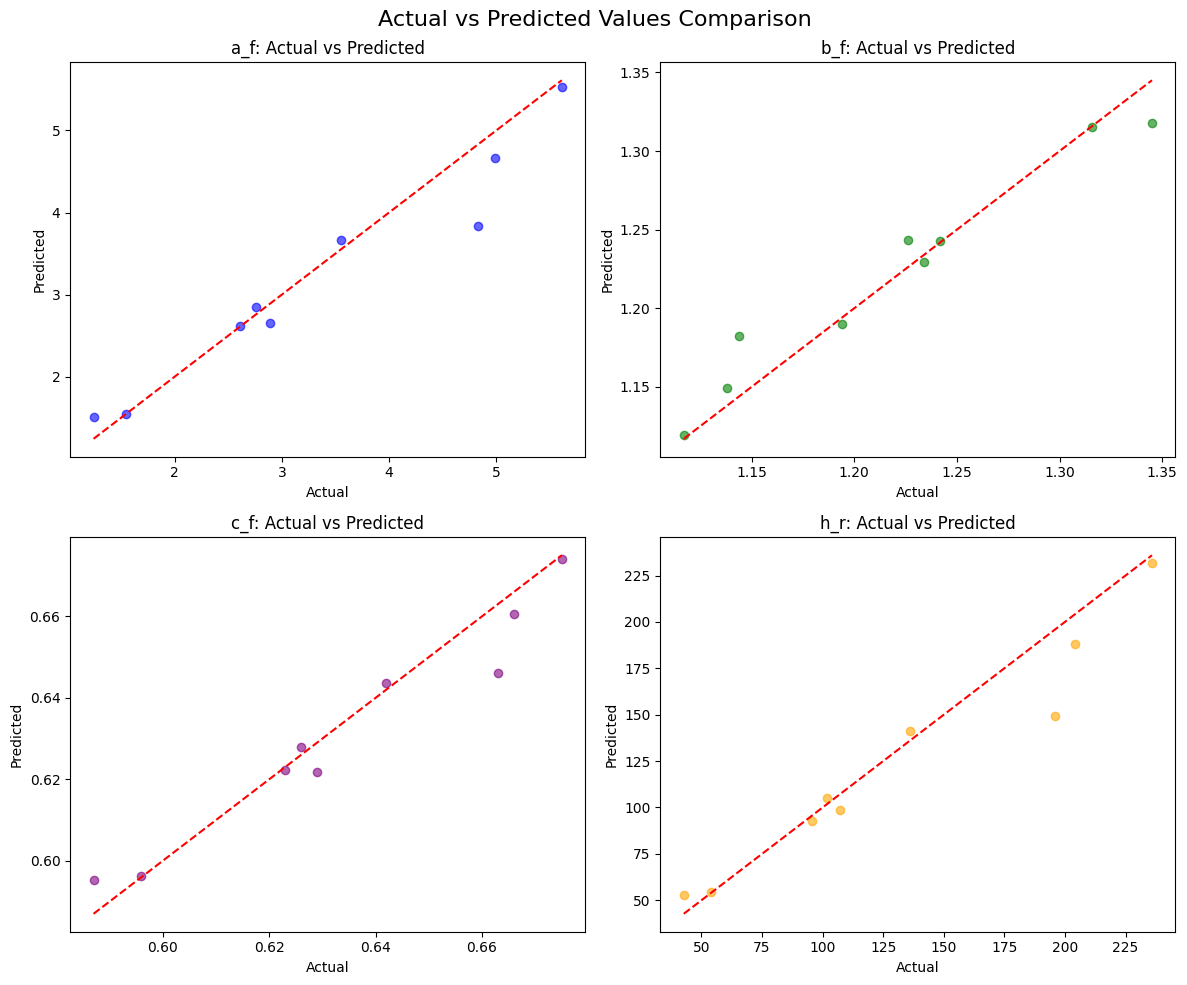

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('results_df.csv')

# Create a figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Actual vs Predicted Values Comparison', fontsize=16)

# Plot a_f
axes[0,0].scatter(df['a_f'], df['a_f_pred'], color='blue', alpha=0.6)
axes[0,0].plot([df['a_f'].min(), df['a_f'].max()], [df['a_f'].min(), df['a_f'].max()], 'r--')
axes[0,0].set_title('a_f: Actual vs Predicted')
axes[0,0].set_xlabel('Actual')
axes[0,0].set_ylabel('Predicted')

# Plot b_f
axes[0,1].scatter(df['b_f'], df['b_f_pred'], color='green', alpha=0.6)
axes[0,1].plot([df['b_f'].min(), df['b_f'].max()], [df['b_f'].min(), df['b_f'].max()], 'r--')
axes[0,1].set_title('b_f: Actual vs Predicted')
axes[0,1].set_xlabel('Actual')
axes[0,1].set_ylabel('Predicted')

# Plot c_f
axes[1,0].scatter(df['c_f'], df['c_f_pred'], color='purple', alpha=0.6)
axes[1,0].plot([df['c_f'].min(), df['c_f'].max()], [df['c_f'].min(), df['c_f'].max()], 'r--')
axes[1,0].set_title('c_f: Actual vs Predicted')
axes[1,0].set_xlabel('Actual')
axes[1,0].set_ylabel('Predicted')

# Plot h_r
axes[1,1].scatter(df['h_r'], df['h_r_pred'], color='orange', alpha=0.6)
axes[1,1].plot([df['h_r'].min(), df['h_r'].max()], [df['h_r'].min(), df['h_r'].max()], 'r--')
axes[1,1].set_title('h_r: Actual vs Predicted')
axes[1,1].set_xlabel('Actual')
axes[1,1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

In [ ]:
results_df.to_csv("results_df.csv", index=False)

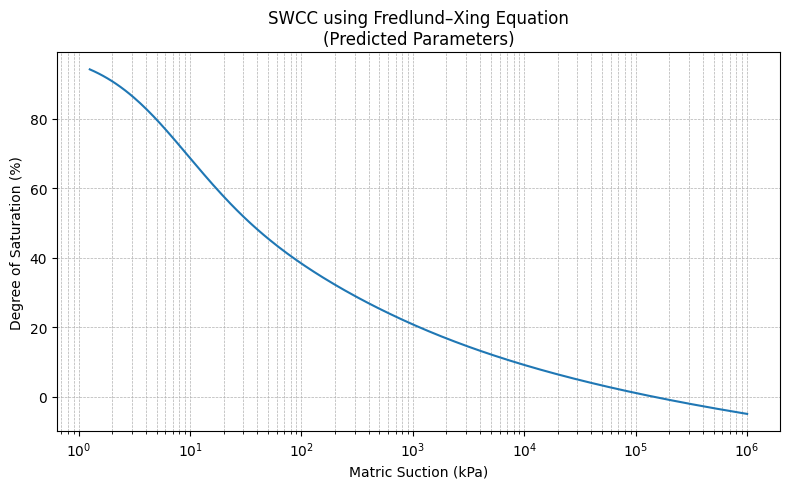

In [ ]:


sample = results_df.iloc[0]


a_f_pred = sample['a_f_pred']
b_f_pred = sample['b_f_pred']
c_f_pred = sample['c_f_pred']
h_r_pred = sample['h_r_pred']

# Define suction range (h in kPa)
h = np.logspace(0.1, 6, 300)  # from ~1 kPa to 1,000,000 kPa

# Fredlund–Xing correction function C(h)
def C(h, h_r_pred):
    return 1 - np.log(1 + h / h_r_pred) / np.log(1 + (1.45e5) / h_r_pred)

# Fredlund–Xing SWCC model
def S(h, a_f_pred, b_f_pred, c_f_pred, h_r_pred):
    return C(h, h_r_pred) * (1 / np.log(np.e + (h / a_f_pred) ** b_f_pred)) ** c_f_pred

# Calculate degree of saturation S(h)
S_h = S(h, a_f_pred, b_f_pred, c_f_pred, h_r_pred)

# Plotting
plt.figure(figsize=(8, 5))
plt.semilogx(h, S_h * 100)  # S in percent
plt.xlabel('Matric Suction (kPa)')
plt.ylabel('Degree of Saturation (%)')
plt.title('SWCC using Fredlund–Xing Equation\n(Predicted Parameters)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
